<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/class/week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow



# Understanding recurrent neural networks

This notebook contains the code samples found in Chapter 6, Section 2 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

---

[...]

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the `SimpleRNN` layer:


In [2]:
from tensorflow.keras.layers import SimpleRNN


There is just one minor difference: `SimpleRNN` processes batches of sequences, like all other Keras layers, not just a single sequence like 
in our Numpy example. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, 
input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 
argument. Let's take a look at an example:

In [4]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [8]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # last layer only return output
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
mlen = 500 # max len 
batch_size = 32

print("Lodading data")
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_features)
print(len(train_x), "train sequences")
print(len(test_x), "test sequences")

print("Padding sequences")
train_x = sequence.pad_sequences(train_x, maxlen = mlen)
test_x = sequence.pad_sequences(test_x, maxlen = mlen)
print("input train shape: ",train_x.shape)
print("input test shape: ", test_x.shape)

Lodading data
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Padding sequences
input train shape:  (25000, 500)
input test shape:  (25000, 500)


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [10]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 335ms/step - loss: 0.6606 - acc: 0.5820 - val_loss: 0.4800 - val_acc: 0.7886
Epoch 2/10
157/157 [==============================] - 53s 336ms/step - loss: 0.3856 - acc: 0.8416 - val_loss: 0.3789 - val_acc: 0.8380
Epoch 3/10
157/157 [==============================] - 52s 334ms/step - loss: 0.2887 - acc: 0.8873 - val_loss: 0.4184 - val_acc: 0.8078
Epoch 4/10
157/157 [==============================] - 52s 330ms/step - loss: 0.2446 - acc: 0.9005 - val_loss: 0.3851 - val_acc: 0.8466
Epoch 5/10
157/157 [==============================] - 52s 333ms/step - loss: 0.1888 - acc: 0.9315 - val_loss: 0.3825 - val_acc: 0.8594
Epoch 6/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1367 - acc: 0.9527 - val_loss: 0.4398 - val_acc: 0.8402
Epoch 7/10
157/157 [==============================] - 52s 333ms/step - loss: 0.1047 - acc: 0.9633 - val_loss: 0.5717 - val_acc: 0.8184
Epoch 8/10
157/157 [==============================] - 5

Let's display the training and validation loss and accuracy:

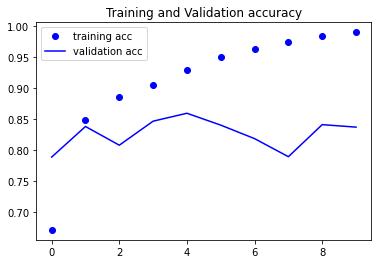

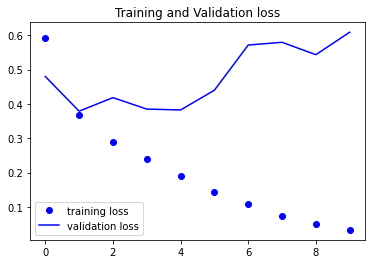

In [11]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

As a reminder, in chapter 3, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small 
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is 
that our inputs only consider the first 500 words rather the full sequences -- 
hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some 
more advanced layers.

[...]

## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [12]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 34s 28ms/step - loss: 0.5965 - acc: 0.6782 - val_loss: 0.3717 - val_acc: 0.8400
Epoch 2/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2987 - acc: 0.8842 - val_loss: 0.3131 - val_acc: 0.8698
Epoch 3/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2232 - acc: 0.9183 - val_loss: 0.4861 - val_acc: 0.8466
Epoch 4/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1998 - acc: 0.9264 - val_loss: 0.4102 - val_acc: 0.8510
Epoch 5/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1692 - acc: 0.9371 - val_loss: 0.3127 - val_acc: 0.8682
Epoch 6/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1549 - acc: 0.9454 - val_loss: 0.3522 - val_acc: 0.8450
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1390 - acc: 0.9525 - val_loss: 0.3232 - val_acc: 0.8622
Epoch 8/10
157/157 [==============================] - 4s 25ms/step -

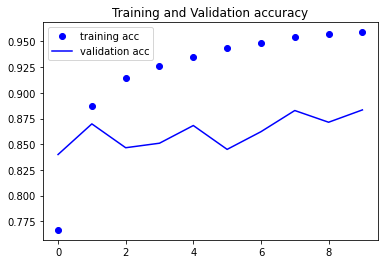

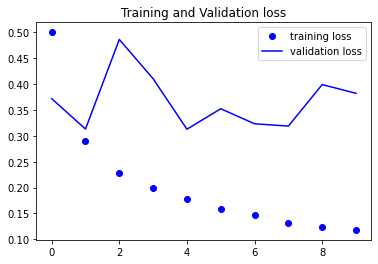

In [13]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label = "validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()